# Imports

In [1]:
import main as code
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.auto import trange

sns.set()

# Utils

In [2]:
def around(x):  # cos round(1.5) == 1 for inbuilt round func
    return np.array([(x + 0.5)], dtype=int)

# Params

In [3]:
params = {"amin": 75, "amax": 90, "bmin": 500, "bmax": 600, "p1": 0.1, "p2": 0.01, "p3": 0.3}

cmin = dmin = 0
cmax = params["amax"] + params["bmax"]
dmax = 2 * (params["amax"] + params["bmax"])

a_sup = np.arange(params["amin"], params["amax"] + 1)
b_sup = np.arange(params["bmin"], params["bmax"] + 1)
c_sup = np.arange(cmin, cmax + 1)
d_sup = np.arange(dmin, dmax + 1)

# Model 1

In [4]:
model = 1

## Expectation and variance of p(a), p(b), p(c) and p(d)

In [5]:
E = code.expectation(*code.pa(params, model))
D = code.variance(*code.pa(params, model))
print(f"E[a] = {E} | D[a] = {D}")

E = code.expectation(*code.pb(params, model))
D = code.variance(*code.pb(params, model))
print(f"E[b] = {E} | D[b] = {D}")

E = code.expectation(*code.pc(params, model))
D = code.variance(*code.pc(params, model))
print(f"E[c] = {E} | D[c] = {D}")

E = code.expectation(*code.pd(params, model))
D = code.variance(*code.pd(params, model))
print(f"E[d] = {E} | D[d] = {D}")

E[a] = 82.5 | D[a] = 21.25
E[b] = 549.9999999999999 | D[b] = 850.0000000001164
E[c] = 13.749999999999996 | D[c] = 13.167500000000018
E[d] = 17.874999999999986 | D[d] = 25.140575000000297


## p(c), p(c|a), p(c|b), p(c|d), p(c|ab), p(c|abd)

In [6]:
Ea = around(code.expectation(*code.pa(params, model)))
Eb = around(code.expectation(*code.pb(params, model)))
Ed = around(code.expectation(*code.pd(params, model)))

### Plots

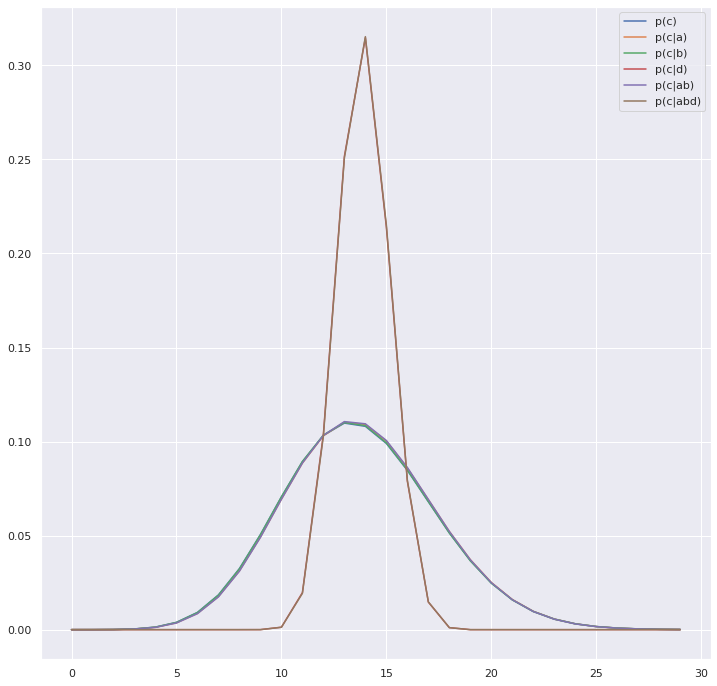

In [7]:
pc, x = code.pc(params, model)
pc_a, _ = code.pc_a(Ea, params, model)
pc_b, _ = code.pc_b(Eb, params, model)
pc_d, _ = code.pc_d(Ed, params, model)
pc_ab, _ = code.pc_ab(Ea, Eb, params, model)
pc_abd, _ = code.pc_abd(Ea, Eb, Ed, params, model)

cut = 30

fig = plt.figure(figsize=(12, 12))
plt.plot(x[:cut], pc[:cut], label="p(c)")
plt.plot(x[:cut], pc_a.flatten()[:cut], label="p(c|a)")
plt.plot(x[:cut], pc_b.flatten()[:cut], label="p(c|b)")
plt.plot(x[:cut], pc_d.flatten()[:cut], label="p(c|d)")
plt.plot(x[:cut], pc_ab.flatten()[:cut], label="p(c|ab)")
plt.plot(x[:cut], pc_abd.flatten()[:cut], label="p(c|abd)")

plt.legend()
plt.show()

### Expectation and variance

In [8]:
Ec = code.expectation(*code.pc(params, model))
Dc = code.variance(*code.pc(params, model))
print(f"E[c] = {Ec} | D[c] = {Dc}")

pc_a = code.pc_a(Ea, params, model)
Ec_a = code.expectation(*pc_a)
Dc_a = code.variance(*pc_a)
print(f"E[c|a] = {Ec_a.item()} | D[c|a] = {Dc_a[0].item()}")

pc_b = code.pc_b(Eb, params, model)
Ec_b = code.expectation(*pc_b)
Dc_b = code.variance(*pc_b)
print(f"E[c|b] = {Ec_b.item()} | D[c|b] = {Dc_b.item()}")

pc_d = code.pc_d(Ed, params, model)
Ec_d = code.expectation(*pc_d)
Dc_d = code.variance(*pc_d)
print(f"E[c|d] = {Ec_d.item()} | D[c|d] = {Dc_d.item()}")

pc_ab = code.pc_ab(Ea, Eb, params, model)
Ec_ab = code.expectation(*pc_ab)
Dc_ab = code.variance(*pc_ab)
print(f"E[c|ab] = {Ec_ab.item()} | D[c|ab] = {Dc_ab.item()}")

pc_abd = code.pc_abd(Ea, Eb, Ed, params, model)
Ec_abd = code.expectation(*pc_abd)
Dc_abd = code.variance(*pc_abd)
print(f"E[c|abd] = {Ec_abd.item()} | D[c|abd] = {Dc_abd.item()}")

E[c] = 13.749999999999996 | D[c] = 13.167500000000018
E[c|a] = 13.799999999999994 | D[c|a] = 13.000000000000057
E[c|b] = 13.749999999999998 | D[c|b] = 13.082500000000039
E[c|d] = 13.895970598988916 | D[c|d] = 1.5335817006729258
E[c|ab] = 13.799999999999994 | D[c|ab] = 12.915000000000106
E[c|abd] = 13.902755594358691 | D[c|abd] = 1.53014020852018


## 4.

### D[c|d] < D[c|b] and D[c|d] < D[c|a]??? 

In [9]:
a = np.arange(params["amin"], params["amax"] + 1)
b = np.arange(params["bmin"], params["bmax"] + 1)
d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

Dc_d = code.variance(*code.pc_d(d, params, model))
Dc_a = code.variance(*code.pc_a(a, params, model))
Dc_b = code.variance(*code.pc_b(b, params, model))

failed = {
    "da": [],
    "db": []
}

for d_ in range(d.size):
    for a_ in range(a.size):
        for b_ in range(b.size):
            if Dc_d[d_] >= Dc_a[a_]:
                failed["da"].append((d_, a_))
                
            if Dc_d[d_] >= Dc_b[b_]:
                failed["db"].append((d_, b_))

/home/breengles/Dropbox/hse/homeworks/Bayes/practice/01. Probabilistic models of class attendance/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= np.sum(prob, axis=1, keepdims=True)


In [10]:
f = False
for k, v in failed.items():
    if len(v) != 0:
        f = True
        print("FAILED")
        print(k)
        print(v)
        
if not f:
    print("D[c|d] < D[c|b] and D[c|d] < D[c|a]")    

D[c|d] < D[c|b] and D[c|d] < D[c|a]


### Linear separability

In [11]:
left, right = [], []

for a_ in range(a.size):
    for b_ in range(b.size):
        if Dc_b[b_] < Dc_a[a_]:
            left.append((a_, b_))
        else:
            right.append((a_, b_))
            
left = np.array(left)
right = np.array(right)

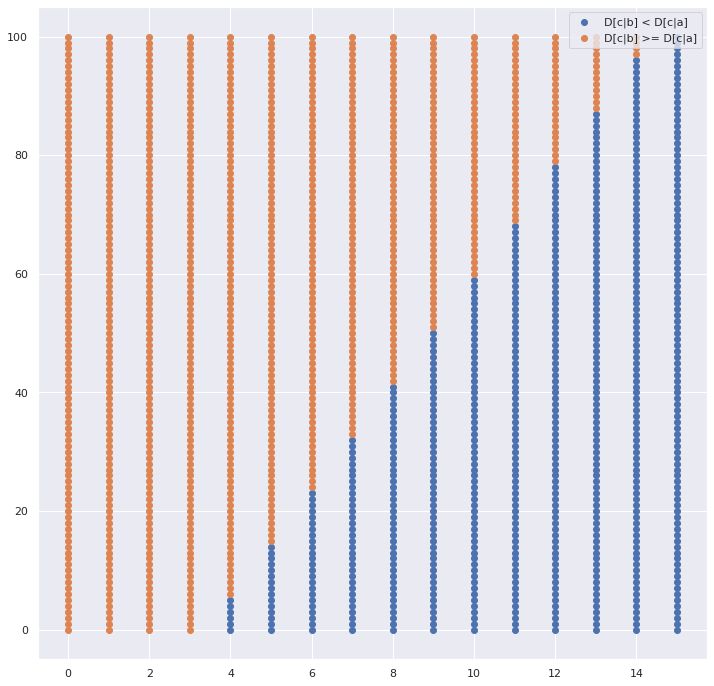

In [12]:
fig = plt.figure(figsize=(12, 12))

plt.scatter(left[:, 0], left[:, 1], label="D[c|b] < D[c|a]")
plt.scatter(right[:, 0], right[:, 1], label="D[c|b] >= D[c|a]")

plt.legend()
plt.show()

## Time

Берем всевозможные допустимые значения для `a, b` и `d`, будем замерять время сразу на всего набора.

In [13]:
a = np.arange(params["amin"], params["amax"] + 1)
b = np.arange(params["bmin"], params["bmax"] + 1)
d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

In [14]:
%%timeit
code.pc(params, model)

107 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
code.pc_a(a, params, model)

110 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%%timeit
code.pc_b(b, params, model)

115 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
code.pc_d(d, params, model)

244 ms ± 98.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
code.pc_ab(a, b, params, model)

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
184 ms ± 84.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
code.pc_abd(a, b, d, params, model)

/home/breengles/Dropbox/hse/homeworks/Bayes/practice/01. Probabilistic models of class attendance/main.py:160: RuntimeWarning: invalid value encountered in true_divide
  proba = num / denom[:, np.newaxis, :, :]


5.32 s ± 71.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
code.pd(params, model)

208 ms ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Model 2

In [21]:
model = 2

## Expectation and variance of p(a), p(b), p(c) and p(d)

In [22]:
E = code.expectation(*code.pa(params, model))
D = code.variance(*code.pa(params, model))
print(f"E[a] = {E} | D[a] = {D}")

E = code.expectation(*code.pb(params, model))
D = code.variance(*code.pb(params, model))
print(f"E[b] = {E} | D[b] = {D}")

E = code.expectation(*code.pc(params, model))
D = code.variance(*code.pc(params, model))
print(f"E[c] = {E} | D[c] = {D}")

E = code.expectation(*code.pd(params, model))
D = code.variance(*code.pd(params, model))
print(f"E[d] = {E} | D[d] = {D}")

E[a] = 82.5 | D[a] = 21.25
E[b] = 549.9999999999999 | D[b] = 850.0000000001164
E[c] = 13.75 | D[c] = 14.047500000000014
E[d] = 17.874999999999993 | D[d] = 26.627775000000156


## p(c), p(c|a), p(c|b), p(c|d), p(c|ab), p(c|abd)

In [23]:
Ea = around(code.expectation(*code.pa(params, model)))
Eb = around(code.expectation(*code.pb(params, model)))
Ed = around(code.expectation(*code.pd(params, model)))

### Plots

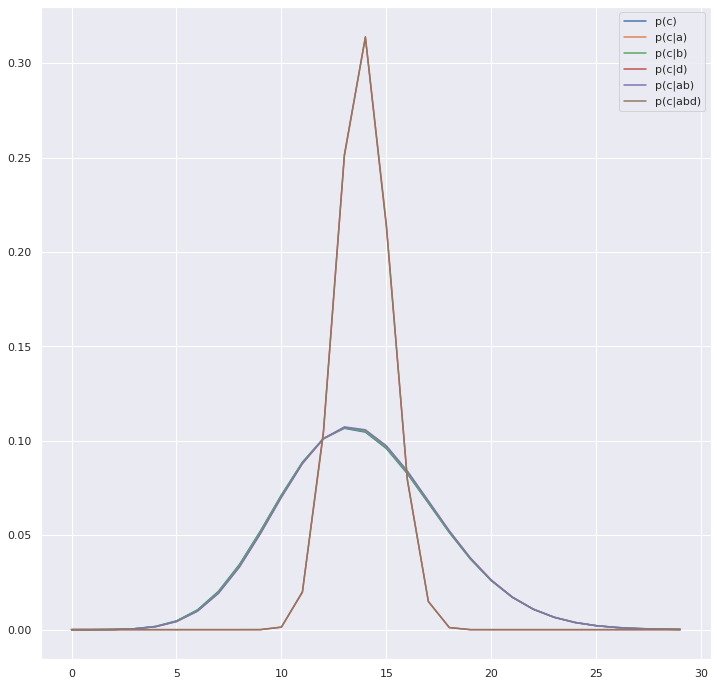

In [24]:
pc, x = code.pc(params, model)
pc_a, _ = code.pc_a(Ea, params, model)
pc_b, _ = code.pc_b(Eb, params, model)
pc_d, _ = code.pc_d(Ed, params, model)
pc_ab, _ = code.pc_ab(Ea, Eb, params, model)
pc_abd, _ = code.pc_abd(Ea, Eb, Ed, params, model)

cut = 30

fig = plt.figure(figsize=(12, 12))
plt.plot(x[:cut], pc[:cut], label="p(c)")
plt.plot(x[:cut], pc_a.flatten()[:cut], label="p(c|a)")
plt.plot(x[:cut], pc_b.flatten()[:cut], label="p(c|b)")
plt.plot(x[:cut], pc_d.flatten()[:cut], label="p(c|d)")
plt.plot(x[:cut], pc_ab.flatten()[:cut], label="p(c|ab)")
plt.plot(x[:cut], pc_abd.flatten()[:cut], label="p(c|abd)")

plt.legend()
plt.show()

### Expectation and variance

In [25]:
Ec = code.expectation(*code.pc(params, model))
Dc = code.variance(*code.pc(params, model))
print(f"E[c] = {Ec} | D[c] = {Dc}")

pc_a = code.pc_a(Ea, params, model)
Ec_a = code.expectation(*pc_a)
Dc_a = code.variance(*pc_a)
print(f"E[c|a] = {Ec_a.item()} | D[c|a] = {Dc_a.item()}")

pc_b = code.pc_b(Eb, params, model)
Ec_b = code.expectation(*pc_b)
Dc_b = code.variance(*pc_b)
print(f"E[c|b] = {Ec_b.item()} | D[c|b] = {Dc_b.item()}")

pc_d = code.pc_d(Ed, params, model)
Ec_d = code.expectation(*pc_d)
Dc_d = code.variance(*pc_d)
print(f"E[c|d] = {Ec_d.item()} | D[c|d] = {Dc_d.item()}")

pc_ab = code.pc_ab(Ea, Eb, params, model)
Ec_ab = code.expectation(*pc_ab)
Dc_ab = code.variance(*pc_ab)
print(f"E[c|ab] = {Ec_ab.item()} | D[c|ab] = {Dc_ab.item()}")

pc_abd = code.pc_abd(Ea, Eb, Ed, params, model)
Ec_abd = code.expectation(*pc_abd)
Dc_abd = code.variance(*pc_abd)
print(f"E[c|abd] = {Ec_abd.item()} | D[c|abd] = {Dc_abd.item()}")

E[c] = 13.75 | D[c] = 14.047500000000014
E[c|a] = 13.800000000000004 | D[c|a] = 13.884999999999962
E[c|b] = 13.750000000000004 | D[c|b] = 13.962499999999949
E[c|d] = 13.893833892236303 | D[c|d] = 1.5439433290955833
E[c|ab] = 13.800000000000008 | D[c|ab] = 13.799999999999898
E[c|abd] = 13.90017516703948 | D[c|abd] = 1.5408838495818884


## 4.

### D[c|d] < D[c|b] and D[c|d] < D[c|a]??? 

In [26]:
a = np.arange(params["amin"], params["amax"] + 1)
b = np.arange(params["bmin"], params["bmax"] + 1)
d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

Dc_d = code.variance(*code.pc_d(d, params, model))
Dc_a = code.variance(*code.pc_a(a, params, model))
Dc_b = code.variance(*code.pc_b(b, params, model))

failed = {
    "da": [],
    "db": []
}

for d_ in range(d.size):
    for a_ in range(a.size):
        for b_ in range(b.size):
            if Dc_d[d_] >= Dc_a[a_]:
                failed["da"].append((d_, a_))
                
            if Dc_d[d_] >= Dc_b[b_]:
                failed["db"].append((d_, b_))

/home/breengles/Dropbox/hse/homeworks/Bayes/practice/01. Probabilistic models of class attendance/main.py:126: RuntimeWarning: invalid value encountered in true_divide
  prob /= np.sum(prob, axis=1, keepdims=True)


In [27]:
f = False
for k, v in failed.items():
    if len(v) != 0:
        f = True
        print("FAILED")
        print(k)
        print(v)
        
if not f:
    print("D[c|d] < D[c|b] and D[c|d] < D[c|a]")    

FAILED
da
[(333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0), (333, 0),

### Linear separability

In [28]:
left, right = [], []

for a_ in range(a.size):
    for b_ in range(b.size):
        if Dc_b[b_] < Dc_a[a_]:
            left.append((a_, b_))
        else:
            right.append((a_, b_))
            
left = np.array(left)
right = np.array(right)

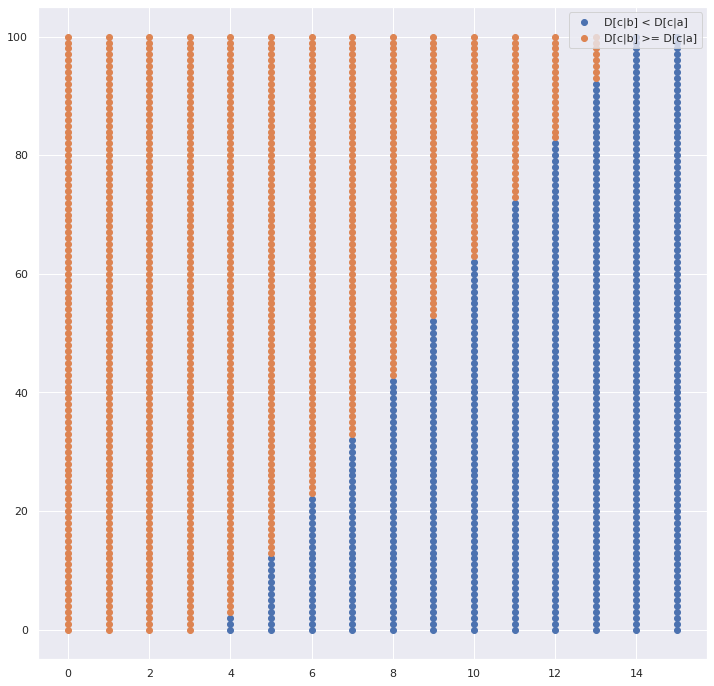

In [29]:
fig = plt.figure(figsize=(12, 12))

plt.scatter(left[:, 0], left[:, 1], label="D[c|b] < D[c|a]")
plt.scatter(right[:, 0], right[:, 1], label="D[c|b] >= D[c|a]")

plt.legend()
plt.show()

## Time

Берем всевозможные допустимые значения для `a, b` и `d`, будем замерять время сразу на всего набора.

In [30]:
a = np.arange(params["amin"], params["amax"] + 1)
b = np.arange(params["bmin"], params["bmax"] + 1)
d = np.arange(0, 2 * (params["amax"] + params["bmax"]) + 1)

In [31]:
%%timeit
code.pc(params, model)

93.1 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%%timeit
code.pc_a(a, params, model)

99.7 ms ± 9.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit
code.pc_b(b, params, model)

104 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
%%timeit
code.pc_d(d, params, model)

189 ms ± 6.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit
code.pc_ab(a, b, params, model)

110 ms ± 26.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
code.pc_abd(a, b, d, params, model)

/home/breengles/Dropbox/hse/homeworks/Bayes/practice/01. Probabilistic models of class attendance/main.py:160: RuntimeWarning: invalid value encountered in true_divide
  proba = num / denom[:, np.newaxis, :, :]


5.53 s ± 268 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
code.pd(params, model)

280 ms ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
